# Midterm Project: Classification Analysis with Banknote Authentication Dataset
**Author:** Eric Meyer

**Date:** 03/30/2025  

**Introduction:** In this project, we apply classification techniques to the Banknote Authentication Dataset from the UCI ML Repository. The goal is to predict whether a banknote is authentic or forged using extracted numerical features. Machine learning classification models will be trained and evaluated to determine the best-performing approach.


## Section 1: Import and Inspect the Data

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Import in order to get dataset
from ucimlrepo import fetch_ucirepo 


### 1.1 Load Dataset and Display First 10 Rows

In [7]:
# Fetch dataset from UCI ML Repo
banknote_authentication = fetch_ucirepo(id=267)

# Assign data (features & target)
X = banknote_authentication.data.features
y = banknote_authentication.data.targets

# Convert to DataFrame
df = pd.concat([X, y], axis=1)

# Display first 10 rows
df.head(10)


,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


### 1.2 Check for Missing Values and Summary Statistics

In [8]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:\n", df.describe())


Missing Values:
 variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

Summary Statistics:
           variance     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


### Reflection 1:

**What do you notice about the dataset?**
- Their are 1,372 datapoints and four numerical features (variance, skewness, curtosis, and entropy)
- The mean as well as the std vary quite vastly, so we may need to scale for ML models
- The class column represents authentic or not fro the banknote (0 or 1)

**Are there any data issues?**
- There is not missing data
- Our summary does confirm the wide range of values such as skewness going from -13.77 to 12.95

## Section 2: Data Exploration and Preparation

### 2.1 Explore Data Patterns and Distributions

<Figure size 1200x800 with 0 Axes>

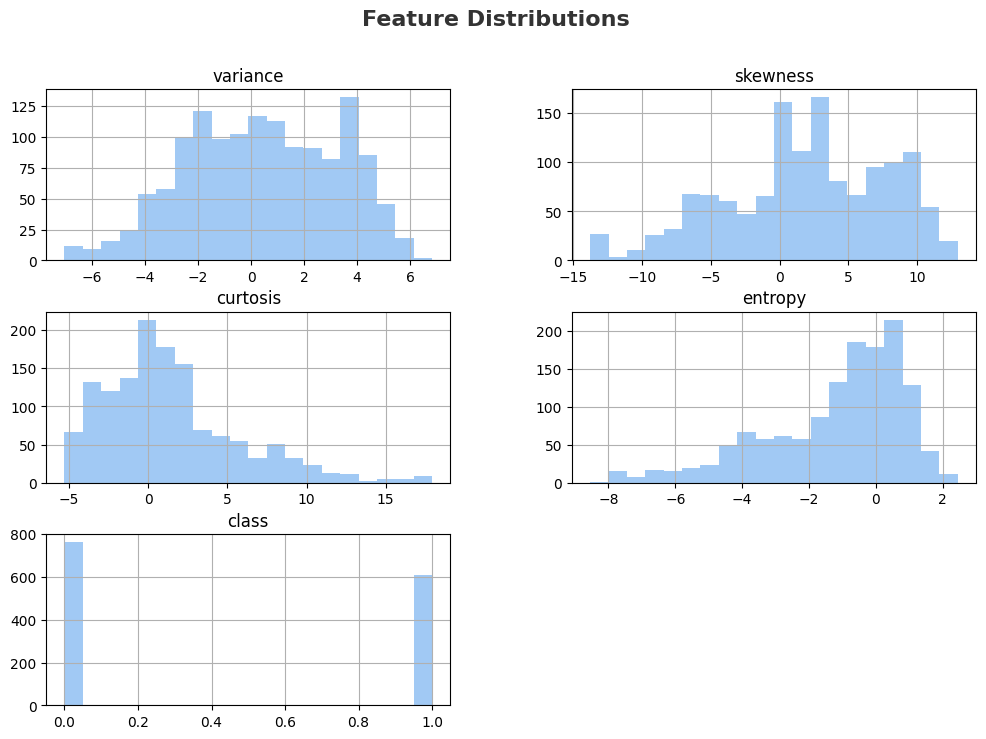

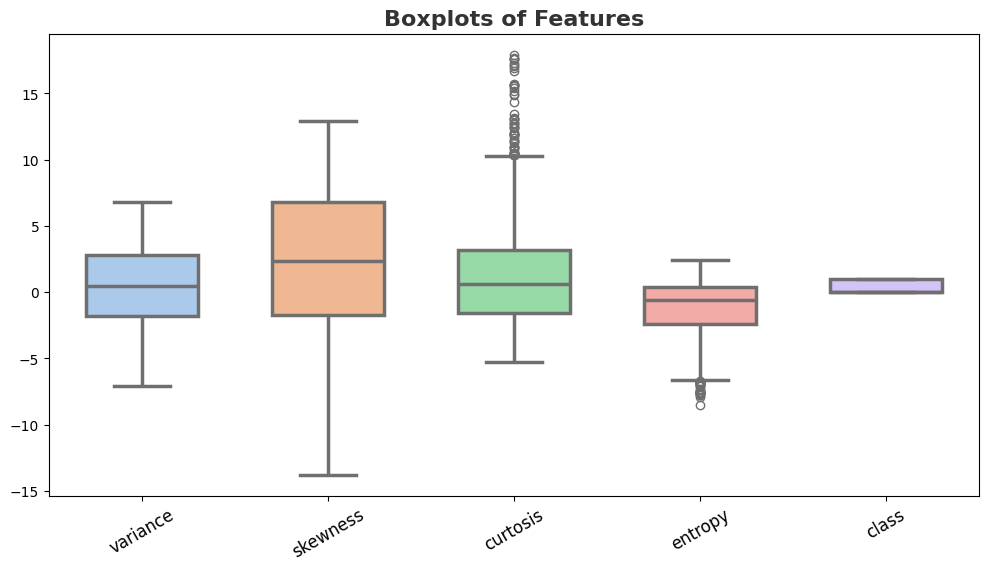

In [10]:
# Histograms
plt.figure(figsize=(12, 8))
df.hist(figsize=(12, 8), bins=20, color=sns.color_palette("pastel")[0])
plt.suptitle("Feature Distributions", fontsize=16, fontweight='bold', color='#333333')
plt.show()

# Boxplots to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, palette="pastel", linewidth=2.5, width=0.6)
plt.xticks(rotation=30, fontsize=12)
plt.title("Boxplots of Features", fontsize=16, fontweight='bold', color='#333333')
plt.show()

### 2.2 Handle Missing Values and Clean Data

#### No missing values detected in previous step, but I will verify data type for our binary column ('Class')

In [12]:
# Confirming our binary column for 'class' is actual integers

print(df['class'].dtype)


int64


### 2.3 Feature Selection and Engineering

In [13]:
# Scale the data to normalize feature distributions
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Reflection 2:

**What patterns or anomalies do you see?**
- Variance and skewness seem somewhat evenly distributed while curtosis and entropy are skewed. Curtosis is left skewed while entropy is right skewed
- There are outliers, but I am curious to see if those are used to identify fraud

**What features did I change?**
- I did not change or encode any features as all columns were numerical which the model can work with well
- I did scale the X features in order to normalize distributions

## Section 3: Feature Selection and Justification

### 3.1 Choose Features and Target

- The **features** (`variance`, `skewness`, `curtosis`, `entropy`) are used to predict the `class` (0 = authentic, 1 = fake banknote).
- These features were chosen based on dataset documentation from UC Irvine

### 3.2 Define X and Y

In [14]:
# Define features and target
X = df.drop(columns=["class"])  # Features
y = df["class"]  # Target

### Reflection 3:

**Why did you choose these features?**
- I chose all features as their is limited fields in this dataset and I think they can all be used to identify fraud
- No categorial encoding was needed as they were all numerical

## Section 4: Train a Classification Model

### 4.1 Split the Data

In [15]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


### 4.2 Create and Train Model (Decision Tree)

In [16]:
# Train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### 4.3 Evaluate Model Performance

Accuracy: 0.9927272727272727
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       153
           1       0.98      1.00      0.99       122

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



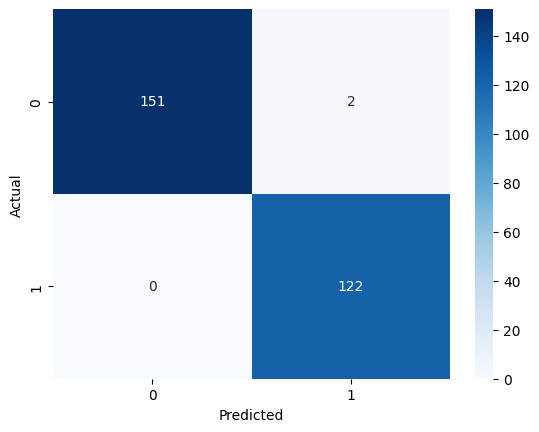

In [17]:
# Predict on test data
y_pred = dt_model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 4.4 Report Confusion Matrix

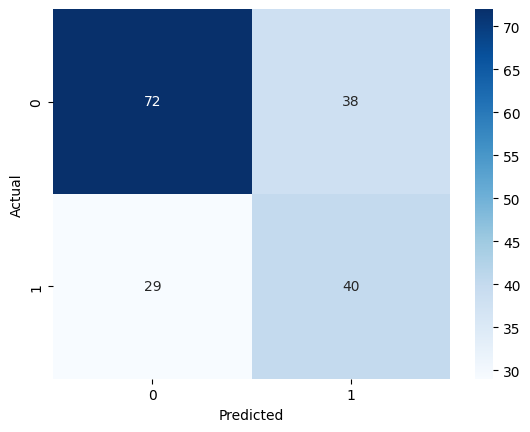

In [45]:
# Confusion matrix visualization
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 4.5 Report Decision Tree Plot

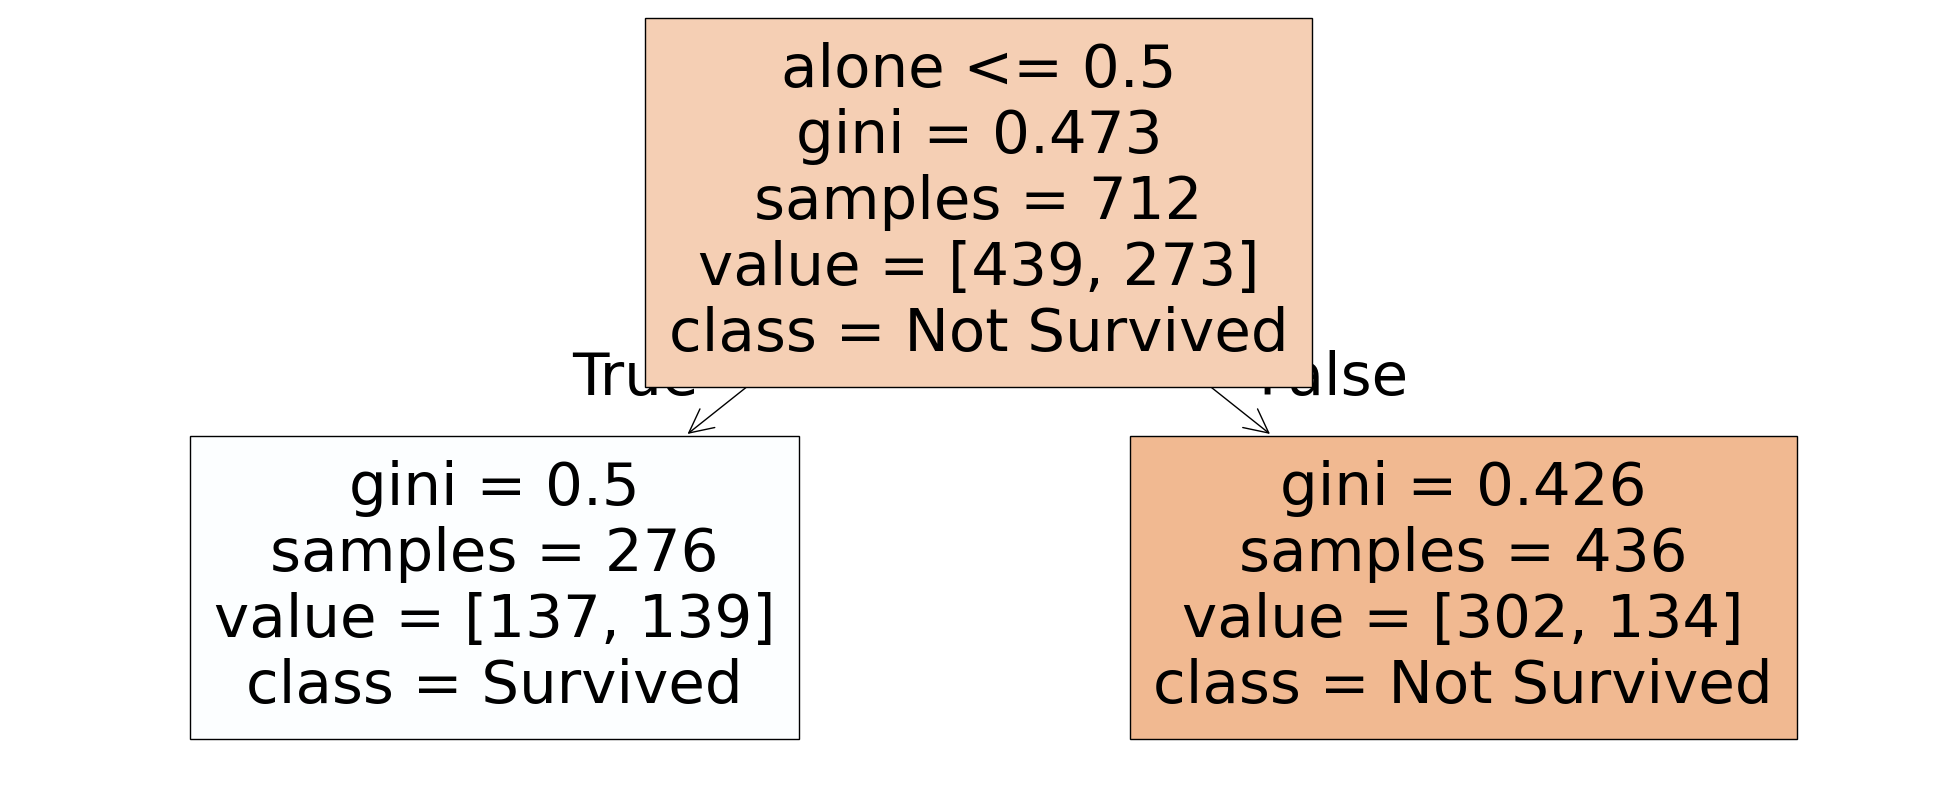

In [46]:
# Plot the decision tree
fig = plt.figure(figsize=(25,10))
plot_tree(tree_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
fig.savefig("decision_tree_titanic.png")

### 4.6 Case 2 -- Steps 4.1 - 4.5

Train size:  712 Test size:  179
Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.68      0.92      0.78       439
           1       0.69      0.29      0.41       273

    accuracy                           0.68       712
   macro avg       0.68      0.61      0.60       712
weighted avg       0.68      0.68      0.64       712

Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.63      0.89      0.74       110
           1       0.50      0.17      0.26        69

    accuracy                           0.61       179
   macro avg       0.57      0.53      0.50       179
weighted avg       0.58      0.61      0.55       179



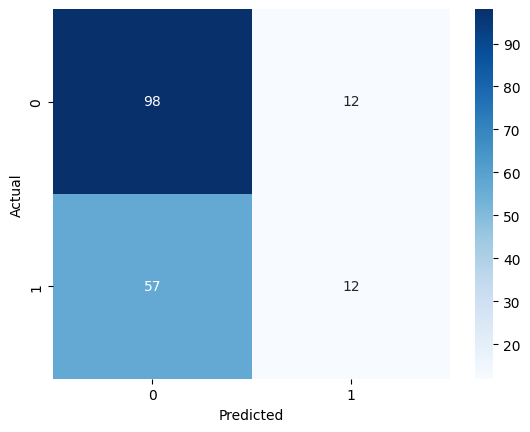

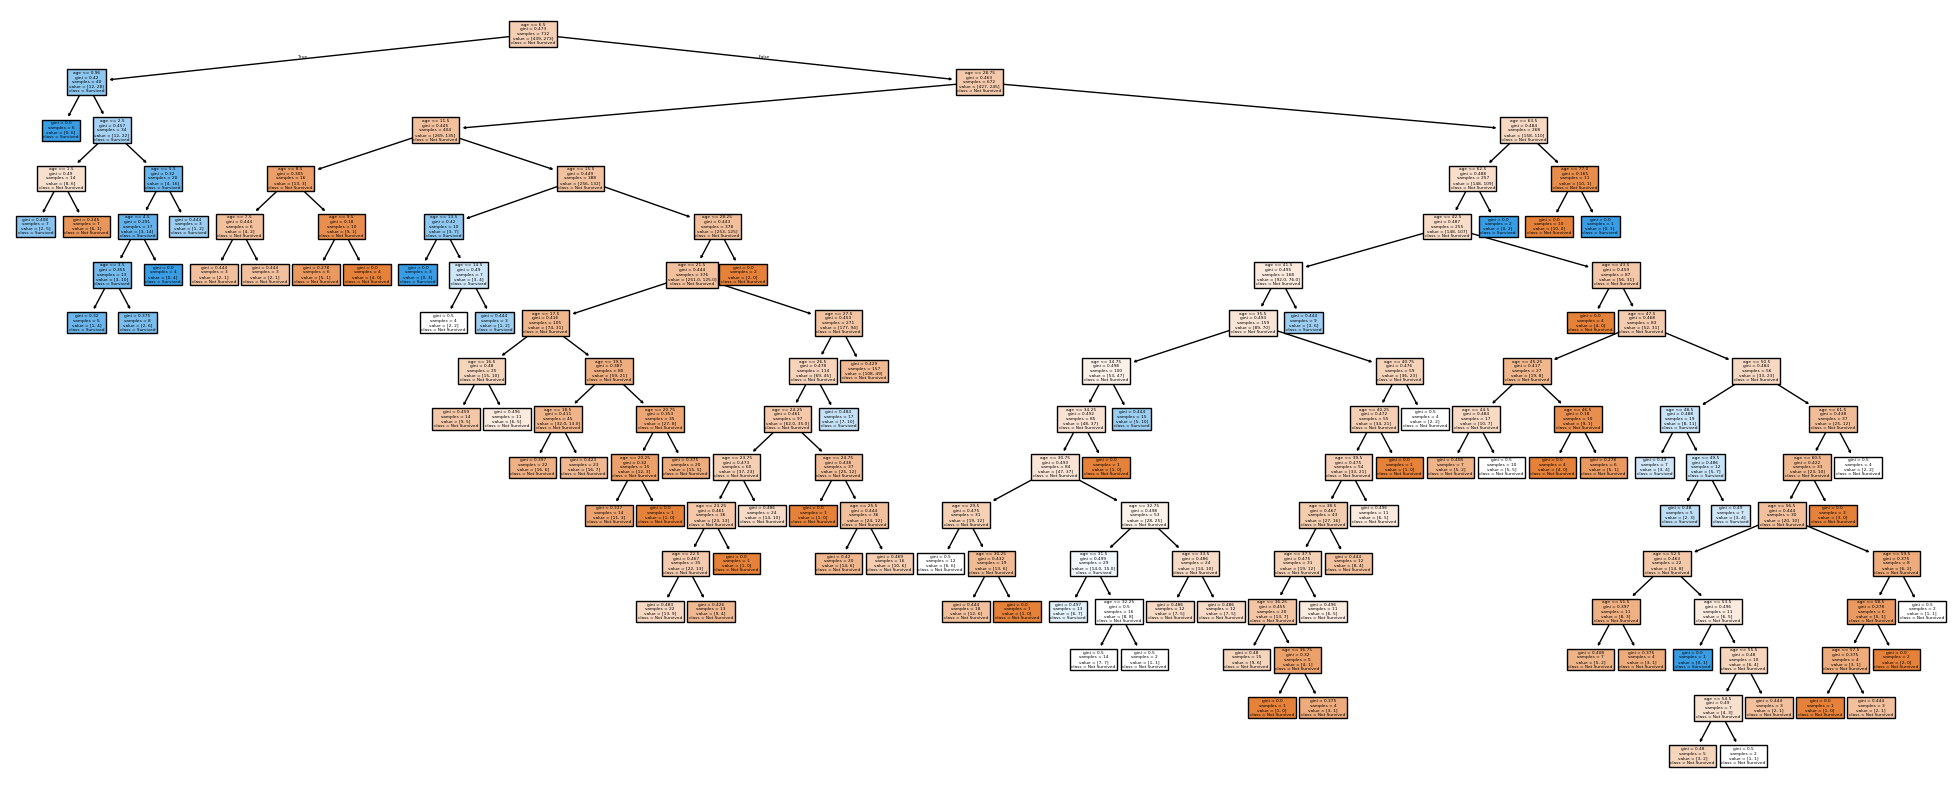

In [55]:
# Split the data into training and testing sets
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_indices, test_indices in splitter.split(X, y):
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

print('Train size: ', len(X_train), 'Test size: ', len(X_test))

# Create and train a Decision Tree model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Evaluate the model on training data
y_pred = tree_model.predict(X_train)
print("Results for Decision Tree on training data:")
print(classification_report(y_train, y_pred))

# Evaluate the model on test data
y_test_pred = tree_model.predict(X_test)
print("Results for Decision Tree on test data:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot the decision tree
fig = plt.figure(figsize=(25,10))
plot_tree(tree_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
fig.savefig("decision_tree_titanic.png")

### 4.7 Case 3 -- Steps 4.1 - 4.5

Train size:  712 Test size:  179
Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       439
           1       0.77      0.56      0.65       273

    accuracy                           0.77       712
   macro avg       0.77      0.73      0.74       712
weighted avg       0.77      0.77      0.76       712

Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.64      0.75      0.69       110
           1       0.45      0.33      0.38        69

    accuracy                           0.59       179
   macro avg       0.55      0.54      0.54       179
weighted avg       0.57      0.59      0.57       179



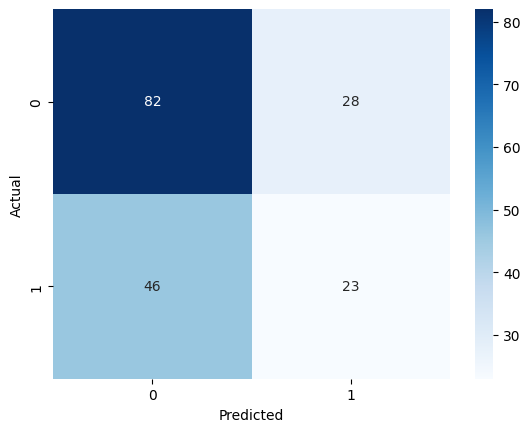

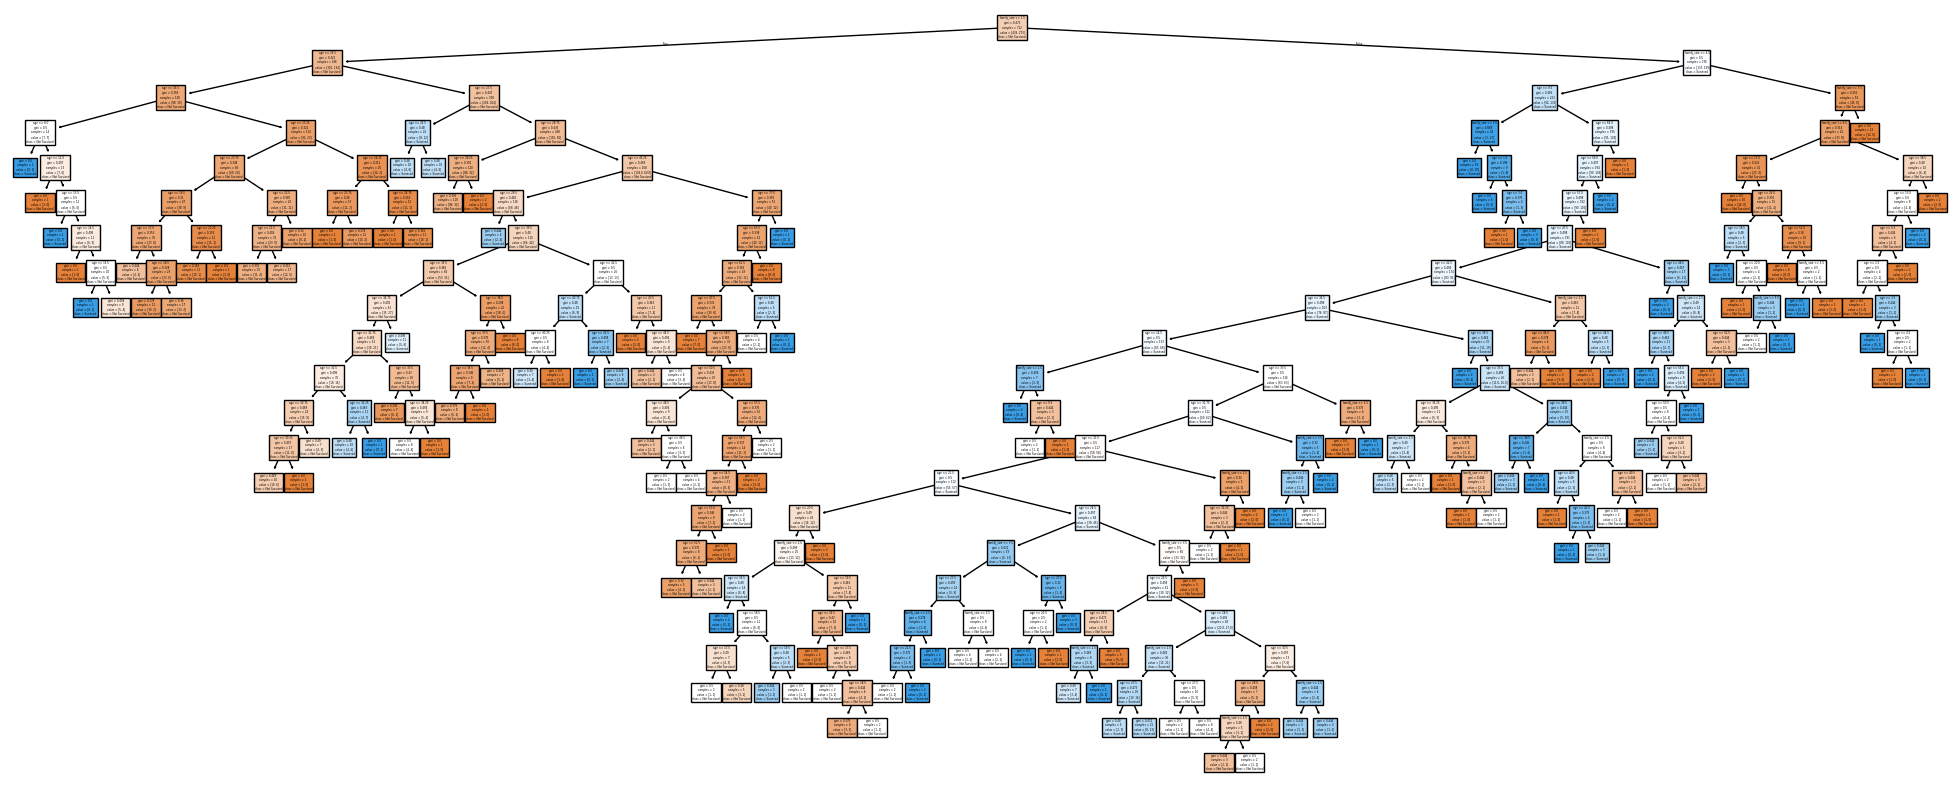

In [58]:
# Split the data into training and testing sets
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_indices, test_indices in splitter.split(X, y):
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

print('Train size: ', len(X_train), 'Test size: ', len(X_test))

# Create and train a Decision Tree model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Evaluate the model on training data
y_pred = tree_model.predict(X_train)
print("Results for Decision Tree on training data:")
print(classification_report(y_train, y_pred))

# Evaluate the model on test data
y_test_pred = tree_model.predict(X_test)
print("Results for Decision Tree on test data:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot the decision tree
fig = plt.figure(figsize=(25,10))
plot_tree(tree_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
fig.savefig("decision_tree_titanic.png")


### Reflection 4:

- How well did the different cases perform?
<br> **In terms of accuracy, Case 1 was 63%, Case 2 was 61%, and Case 3 was 59%.**

- Are there any suprising results?
<br> **I am honestly suprised that none of them are higher than they are. I thought we would see above 70% on at least one of them. It makes me wonder if their are better input values.**

- Which inputs worked better?
<br> **Alone was the best feature in this test for predicting survival.**

## Section 5: Compare Alternative Models (SVC, NN)

In [18]:
# RBF Kernel (default) - same as calling SVC()
# svc_model = SVC(kernel='rbf')
# svc_model.fit(X_train, y_train)

# Linear Kernel
# svc_model = SVC(kernel='linear')
# svc_model.fit(X_train, y_train)

# Polynomial Kernel (e.g., with degree=3)
# svc_model = SVC(kernel='poly', degree=3)
# svc_model.fit(X_train, y_train)

# Sigmoid Kernel
# svc_model = SVC(kernel='sigmoid')
# svc_model.fit(X_train, y_train)

### 5.1 Train and Evaluate Model (SVC RBF)

#### Case 1 Results -- Alone Only

In [32]:
# Create and train a Support Vector Classifier (SVC) model
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

# Evaluate SVC model
y_pred_svc = svc_model.predict(X_test)
print("Results for SVC on test data:")
print(classification_report(y_test, y_pred_svc))

Results for SVC on test data:
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



#### Case 2 Results -- Age Only

In [36]:
# Create and train a Support Vector Classifier (SVC) model
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

# Evaluate SVC model
y_pred_svc = svc_model.predict(X_test)
print("Results for SVC on test data:")
print(classification_report(y_test, y_pred_svc))

Results for SVC on test data:
              precision    recall  f1-score   support

           0       0.63      0.98      0.77       110
           1       0.71      0.07      0.13        69

    accuracy                           0.63       179
   macro avg       0.67      0.53      0.45       179
weighted avg       0.66      0.63      0.52       179



#### Case 3 Results -- Age + Family Size

In [19]:
# Create and train a Support Vector Classifier (SVC) model
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

# Evaluate SVC model
y_pred_svc = svc_model.predict(X_test)
print("Results for SVC on test data:")
print(classification_report(y_test, y_pred_svc))

Results for SVC on test data:
              precision    recall  f1-score   support

           0       0.63      0.98      0.77       110
           1       0.71      0.07      0.13        69

    accuracy                           0.63       179
   macro avg       0.67      0.53      0.45       179
weighted avg       0.66      0.63      0.52       179



### 5.1 Train and Evaluate Model (SVC Linear)

#### Case 1 Results -- Alone Only

In [47]:
# Linear Kernel
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)

# Evaluate the model
y_pred_svc = svc_model.predict(X_test)
print("Results for SVC on test data:")
print(classification_report(y_test, y_pred_svc))

Results for SVC on test data:
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



#### Case 2 Results -- Age Only

In [37]:
# Linear Kernel
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)

# Evaluate the model
y_pred_svc = svc_model.predict(X_test)
print("Results for SVC on test data:")
print(classification_report(y_test, y_pred_svc))

Results for SVC on test data:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       110
           1       0.00      0.00      0.00        69

    accuracy                           0.61       179
   macro avg       0.31      0.50      0.38       179
weighted avg       0.38      0.61      0.47       179



c:\Projects\applied-ml-eric\.emvenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Projects\applied-ml-eric\.emvenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Projects\applied-ml-eric\.emvenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Case 3 -- Age + Family Size

In [40]:
# Linear Kernel
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)

# Evaluate the model
y_pred_svc = svc_model.predict(X_test)
print("Results for SVC on test data:")
print(classification_report(y_test, y_pred_svc))

Results for SVC on test data:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       110
           1       0.00      0.00      0.00        69

    accuracy                           0.61       179
   macro avg       0.31      0.50      0.38       179
weighted avg       0.38      0.61      0.47       179



c:\Projects\applied-ml-eric\.emvenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Projects\applied-ml-eric\.emvenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Projects\applied-ml-eric\.emvenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 5.2 Train and Evaluate Model (NN MLP)

#### Case 1 Results -- Alone Only

Results for Neural Network on test data:
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



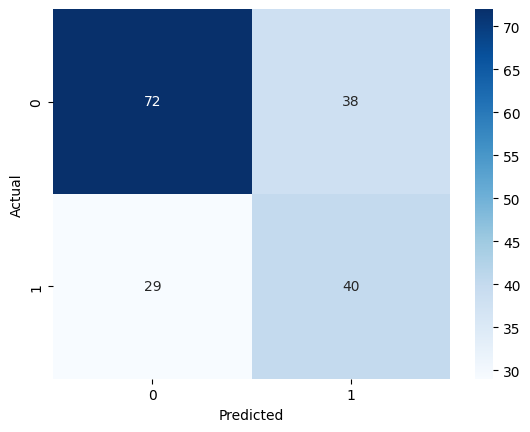

In [53]:
# Train a Neural Network model
nn_model = MLPClassifier(hidden_layer_sizes=(50, 25, 10), solver='lbfgs', random_state=123)
nn_model.fit(X_train, y_train)

# Evaluate Neural Network model
y_pred_nn = nn_model.predict(X_test)
print("Results for Neural Network on test data:")
print(classification_report(y_test, y_pred_nn))

# Plot confusion matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm_nn, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Case 2 Results -- Age Only

Results for Neural Network on test data:
              precision    recall  f1-score   support

           0       0.63      0.98      0.77       110
           1       0.71      0.07      0.13        69

    accuracy                           0.63       179
   macro avg       0.67      0.53      0.45       179
weighted avg       0.66      0.63      0.52       179



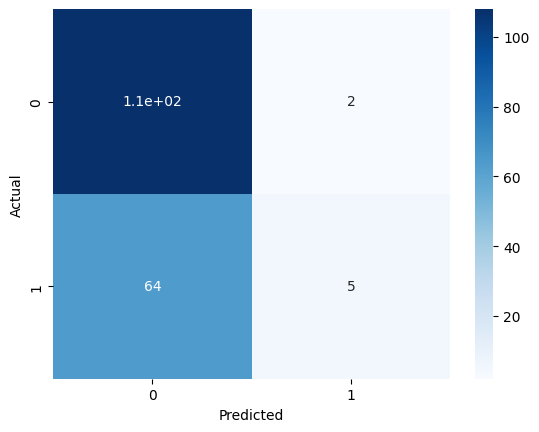

In [56]:
# Train a Neural Network model
nn_model = MLPClassifier(hidden_layer_sizes=(50, 25, 10), solver='lbfgs', random_state=123)
nn_model.fit(X_train, y_train)

# Evaluate Neural Network model
y_pred_nn = nn_model.predict(X_test)
print("Results for Neural Network on test data:")
print(classification_report(y_test, y_pred_nn))

# Plot confusion matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm_nn, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Case 3 Results -- Age + Family

c:\Projects\applied-ml-eric\.emvenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Results for Neural Network on test data:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       110
           1       0.56      0.51      0.53        69

    accuracy                           0.65       179
   macro avg       0.63      0.63      0.63       179
weighted avg       0.65      0.65      0.65       179



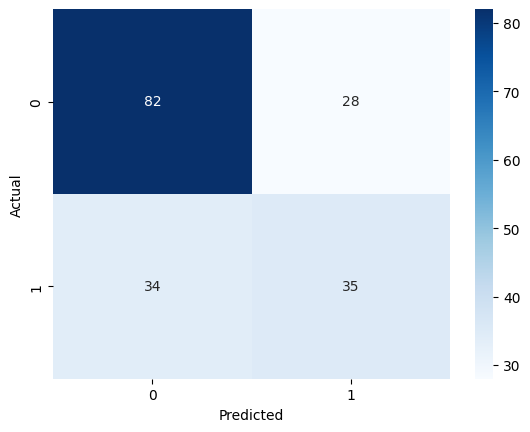

In [59]:
# Train a Neural Network model
nn_model = MLPClassifier(hidden_layer_sizes=(50, 25, 10), solver='lbfgs', random_state=123)
nn_model.fit(X_train, y_train)

# Evaluate Neural Network model
y_pred_nn = nn_model.predict(X_test)
print("Results for Neural Network on test data:")
print(classification_report(y_test, y_pred_nn))

# Plot confusion matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm_nn, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Reflection 5:

- How did each model perform?
<br> **In terms of accuracy, the SVC RBF ranged from 61-63% from case to case, while the NN MLP ranged from 63-65% from case to case. Both were very similar.**

- Are there any suprising results?
<br> **The SVC RBF performed more accurate with just the alone input while the NN MLP was more accurate with the two inputs of age and family size which makes more sense. The NN also seemed to perform better with it's recall percentages being consistently higher than that of the SVC RBF.**

- Why might one model out perform another?
<br> **SVC with an RBF kernel is more suited to non-linear decision boundaries, while Neural Networks tend to perform well with complex patterns. This leads me to think that is why the NN could handle the complexities more efficiently.**

## Section 6: Final Thoughts and Insights

### 6.1 Summarize Findings

- **Strong Predictors of Gender:**

    Key indicators influencing gender classification include age, family size, and alone.

- **Model Performance Comparison:**
  - **Decision Tree:** Performed well but showed signs of overfitting, as it achieved high accuracy on the training set but had slightly reduced generalizability on the test data.
  - **Neural Network:** Three different configurations were tested, each producing varying levels of accuracy and balance between precision and recall.
    - **Case 1:** Achieved a balanced performance with 63% accuracy but had lower precision for Class 1.
    - **Case 2:** Showed extreme bias toward Class 0, with nearly perfect recall for Class 0 but failed to identify Class 1 effectively.
    - **Case 3:** Provided the best overall balance, with 65% accuracy and improved precision-recall tradeoffs for both classes.
  
- **Best Model:** Case 3 of the Neural Network demonstrated the most stable performance, avoiding extreme biases while slightly outperforming the Decision Tree in generalization.

### 6.2 Discuss Challenges Faces

- **Small Sample Size:** The limited number of data points (179 in the test set) may restrict the model’s ability to generalize well to unseen data.

- **Class Imbalance:** The difference in support for Class 0 and Class 1 may have led to biased predictions, particularly in NN Case 2, where the model favored Class 0 almost exclusively.

### 6.3 Next Steps

- **Feature Engineering:** Test additional predictors, such as age groups, or other demographic factors, to enhance model performance.
  
- **Hyperparameter Tuning:** Adjust learning rates, activation functions, dropout rates, or hidden layers in the Neural Network to improve results.